In [5]:
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pyplot as plt
import seaborn as sns
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gp
import os

In [4]:
#%% define color
shpfile = '/home/mgou/Dropbox/postdoc/summa/columbia/data/columbia_hru_output.shp'
nhru = 11723

if os.path.exists(shpfile):
    print('I am here')
else:
    print('missing file')
    exit()
    

gdf = gp.GeoDataFrame.from_file(shpfile)
lh = gdf['LtHtTtl']
lhmax = lh.max()
lhmin = lh.min()
lhnew = (lh-lhmin)/(lhmax-lhmin)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)


I am here


TypeError: type object argument after ** must be a mapping, not UTM

In [7]:
gdf.to_crs(crs = ccrs.Geodetic(), inplace = True)


TypeError: type object argument after ** must be a mapping, not Geodetic

In [32]:
#%% plot
# start to plot
plt.figure(figsize=(12,12))

ax = plt.axes(projection=ccrs.Mercator(central_longitude=-120, min_latitude=41, max_latitude=53, globe=None)) 
ax.set_extent([-109.5, -125.01, 40, 53], ccrs.UTM(11))

#%% set up background
gl=ax.gridlines(draw_labels=True, xlocs = [-100, -110, -115, -120, -125], ylocs = [40, 42, 44, 46 ,48, 50, 52])
gl.xlabels_top = False
gl.ylabels_right = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

country_borders = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_boundary_lines_land',
        scale='50m',
        facecolor='none')

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='gray')

ocean = cfeature.NaturalEarthFeature(
    category='physical',
    name='ocean',
    scale='50m',
    facecolor='blue')

rivers_lakes = cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines',
    scale='50m',
    facecolor='none')

ax.add_feature(land,facecolor='lightgray', zorder = 1)
ax.add_feature(ocean,facecolor='lightblue', zorder = 1)
ax.add_feature(states_provinces, edgecolor='black', zorder = 2) #linewidth = 2
ax.add_feature(country_borders, edgecolor='black', zorder = 2)

#%% add HRU plot
# read shape file using cartopy's Reader
#shphru = cartopy.io.shapereader.Reader('D:\\@Workspace\\SUMMA\\shapefiles\\ColumbiaBasin_Proj.shp')
#shphru = cartopy.io.shapereader.Reader('D:\\@Workspace\\SUMMA\\outputs\\columbia_hru_output.shp')
shphru = cartopy.io.shapereader.Reader(shpfile)
hrus = shphru.records()

ihru = 0
print('length of HRUs {0}'.format(len(hrus)))
gdfgeom = gdf.geometry()
for hru in hrus:
    ax.add_geometries(hru.geometry, crs=ccrs.epsg(5070), facecolor=cmap(lhnew[ihru]), linewidth=0,zorder=3)
    ihru += 1
    if ihru > 100: break

if (ihru != 11723):
    print('short of hru')
else:
    print('I did all the work')
plt.figure(figsize=(12,12))
gdf.plot(linewidth=0)


TypeError: plot_dataframe() got an unexpected keyword argument 'linewidth'

In [34]:

gdfgeom = gdf.geometry

In [35]:
len(gdfgeom)

11723

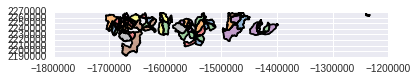

In [38]:
gdfgeom[1:100].plot()